In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_X = pd.read_csv('C:/Users/zihan/Documents/Stroke_prediction_system_Data/Prf_feature_train.csv')
train_y = pd.read_csv('C:/Users/zihan/Documents/Stroke_prediction_system_Data/Stroke_label_train.csv')
test_X = pd.read_csv('C:/Users/zihan/Documents/Stroke_prediction_system_Data/Prf_feature_test.csv')
selected_features = pd.read_csv('./Feature_selected.csv')

In [34]:
#对原始数据label处理
train_y [train_y['Stroke']>1]=0

In [35]:
#原始数据feature处理
#使用筛选的feature
train_X_sel1=train_X[selected_features['Feature']]
test_X_sel1=test_X[selected_features['Feature']]

#删除掉NaN值超过80%的feature，thresh=n是指保留下来的每一行,其非NA的数目>=n
train_X_sel2=train_X_sel1.dropna(axis='columns',thresh=0.2*train_X_sel1.shape[0])
test_X_sel2=test_X_sel1.dropna(axis='columns',thresh=0.2*test_X_sel1.shape[0])

#对剩下的NaN进行填充
train_X_sel=train_X_sel2.fillna(train_X_sel2.mean())
test_X_sel=test_X_sel2.fillna(test_X_sel2.mean())
print('\033[1mTrain dataset size with selected features is\033[0m',train_X_sel.shape,'.')
print('\033[1mTest dataset size with selected features is\033[0m',test_X_sel.shape,'.')

Train dataset size with selected features is (400000, 95) .
Test dataset size with selected features is (33119, 95) .


In [36]:
train_X_sel.to_csv(r'train_X_sel.csv')
test_X_sel.to_csv(r'test_X_sel.csv')

# ①心脏病患者分成合适的类，看看训练集和测试集的结果是否一致

In [37]:
#先找出有心脏病的患者
train_X_HeartDisease_sel = train_X_sel[~(train_X_sel['HeartDisease'].isin([2]))]
test_X_HeartDisease_sel = test_X_sel[~(test_X_sel['HeartDisease'].isin([2]))]
print('\033[1mIt is %s that features of selected heart disease patients in train dataset are the same as the ones in test dataset.\n\033[0m'
      %train_X_HeartDisease_sel.columns.equals(test_X_HeartDisease_sel.columns))
print('\033[1mTrain dataset size of selected heart disease patients is\033[0m',train_X_HeartDisease_sel.shape,'.')
display(train_X_HeartDisease_sel)
print('\033[1mTest dataset size of selected heart disease patients is\033[0m',test_X_HeartDisease_sel.shape,'.')
display(test_X_HeartDisease_sel)

It is True that features of selected heart disease patients in train dataset are the same as the ones in test dataset.

Train dataset size of selected heart disease patients is (32353, 95) .


,X_STATE,DISPCODE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PERSDOC3,MEDCOST1,EXERANY2,BPHIGH6,...,POTADA1_,VEGEDA2_,X_FRUTSU1,X_VEGESU1,X_FRTLT1A,X_VEGLT1A,X_FRT16A,X_VEG23A,X_FRUITE1,X_VEGETE1
7,29,1100,3.0,88.0,88,54.054789,2,2.0,1,1,...,10.0,100.0,114.000000,167.0,1,1,1,1,0,0
8,4,1100,2.0,88.0,3,88.000000,1,2.0,1,3,...,14.0,100.0,214.000000,228.0,1,1,1,1,0,0
9,28,1100,3.0,88.0,88,54.054789,2,2.0,1,1,...,43.0,100.0,71.000000,193.0,2,1,1,1,0,0
16,30,1100,4.0,30.0,88,10.000000,2,2.0,1,1,...,33.0,67.0,33.000000,133.0,2,1,1,1,0,0
18,27,1100,5.0,30.0,30,30.000000,1,2.0,2,3,...,0.0,14.0,100.000000,31.0,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399925,4,1100,4.0,77.0,88,77.000000,1,2.0,2,3,...,7.0,0.0,3.000000,7.0,2,2,1,1,0,0
399962,29,1100,5.0,30.0,30,88.000000,2,2.0,1,1,...,29.0,100.0,129.000000,201.0,1,1,1,1,0,0
399966,4,1100,5.0,30.0,88,30.000000,3,2.0,2,1,...,3.0,17.0,83.000000,27.0,2,2,1,1,0,0
399977,38,1100,2.0,2.0,88,88.000000,3,2.0,1,1,...,57.0,71.0,177.853974,214.0,9,1,1,1,1,0


Test dataset size of selected heart disease patients is (2738, 95) .


,X_STATE,DISPCODE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PERSDOC3,MEDCOST1,EXERANY2,BPHIGH6,...,POTADA1_,VEGEDA2_,X_FRUTSU1,X_VEGESU1,X_FRTLT1A,X_VEGLT1A,X_FRT16A,X_VEG23A,X_FRUITE1,X_VEGETE1
18,18,1100,4,88,88,53.676848,2,2,1,1,...,3.000000,57.000000,71.000000,103.000000,2,1,1,1,0,0
21,26,1200,2,88,1,88.000000,2,2,2,3,...,27.831159,141.830839,180.813231,277.655339,9,9,1,1,1,1
57,15,1100,3,88,10,30.000000,1,2,2,3,...,2.000000,330.000000,373.000000,762.000000,1,1,1,1,0,0
76,31,1100,3,88,15,5.000000,1,2,1,1,...,3.000000,67.000000,116.000000,123.000000,1,1,1,1,0,0
93,54,1100,3,4,30,88.000000,2,2,1,1,...,3.000000,3.000000,300.000000,63.000000,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33080,48,1200,2,10,77,77.000000,1,2,2,1,...,27.831159,43.000000,29.000000,277.655339,2,9,1,1,0,1
33107,47,1100,3,7,30,15.000000,3,1,1,3,...,0.000000,14.000000,100.000000,116.000000,1,1,1,1,0,0
33108,46,1100,3,88,88,53.676848,1,2,1,3,...,14.000000,14.000000,300.000000,56.000000,1,2,1,1,0,0
33109,36,1100,2,88,88,53.676848,1,2,1,3,...,7.000000,57.000000,143.000000,100.000000,1,1,1,1,0,0


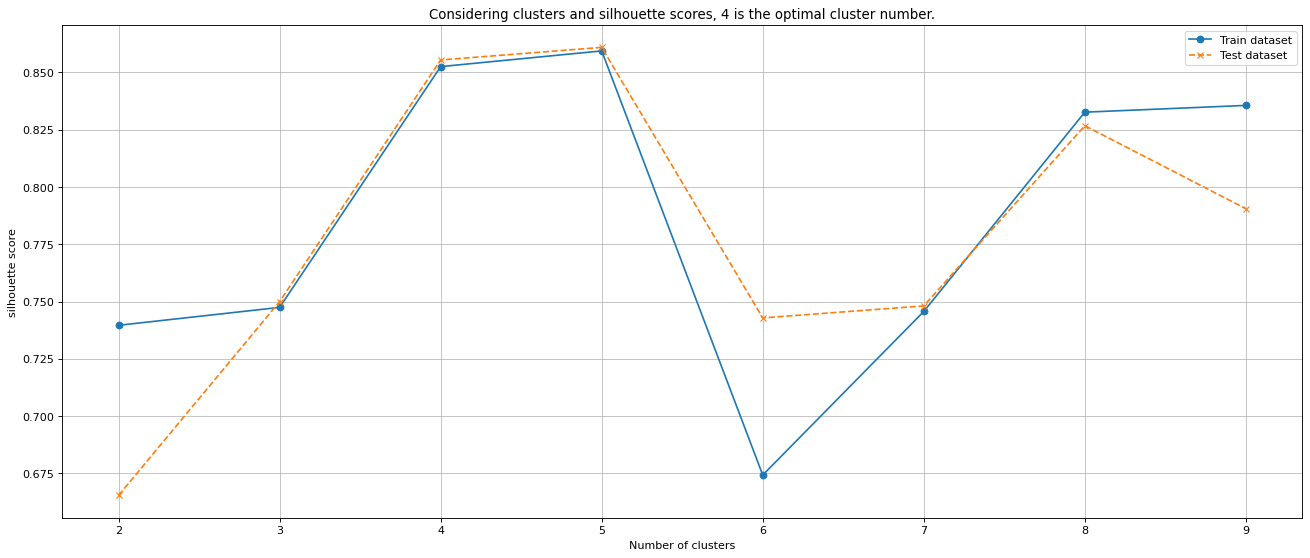

In [38]:
#用Kmeans将心脏病患者分类，并使用轮廓系数（Silhouette Coefficient）进行聚类效果评估
#轮廓系数的值介于 [-1,1] ，越趋近于1代表内聚度和分离度都相对较优
from sklearn.cluster import KMeans
from sklearn import metrics
scores1 = []
scores2 = []
for i in range(2,10):
    kmeans1 = KMeans(n_clusters=i, random_state=0).fit(train_X_HeartDisease_sel)
    scores1.append(metrics.silhouette_score(train_X_HeartDisease_sel, kmeans1.labels_ , metric='euclidean'))
    kmeans2 = KMeans(n_clusters=i, random_state=0).fit(test_X_HeartDisease_sel)
    scores2.append(metrics.silhouette_score(test_X_HeartDisease_sel, kmeans2.labels_ , metric='euclidean'))

#数据可视化，簇的最佳值是4
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(range(2,10), scores1,label='Train dataset',marker='o')
plt.plot(range(2,10), scores2,label='Test dataset',marker='x',linestyle='--')
plt.grid(alpha=0.8)
plt.legend()
plt.title('Considering clusters and silhouette scores, 4 is the optimal cluster number.')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

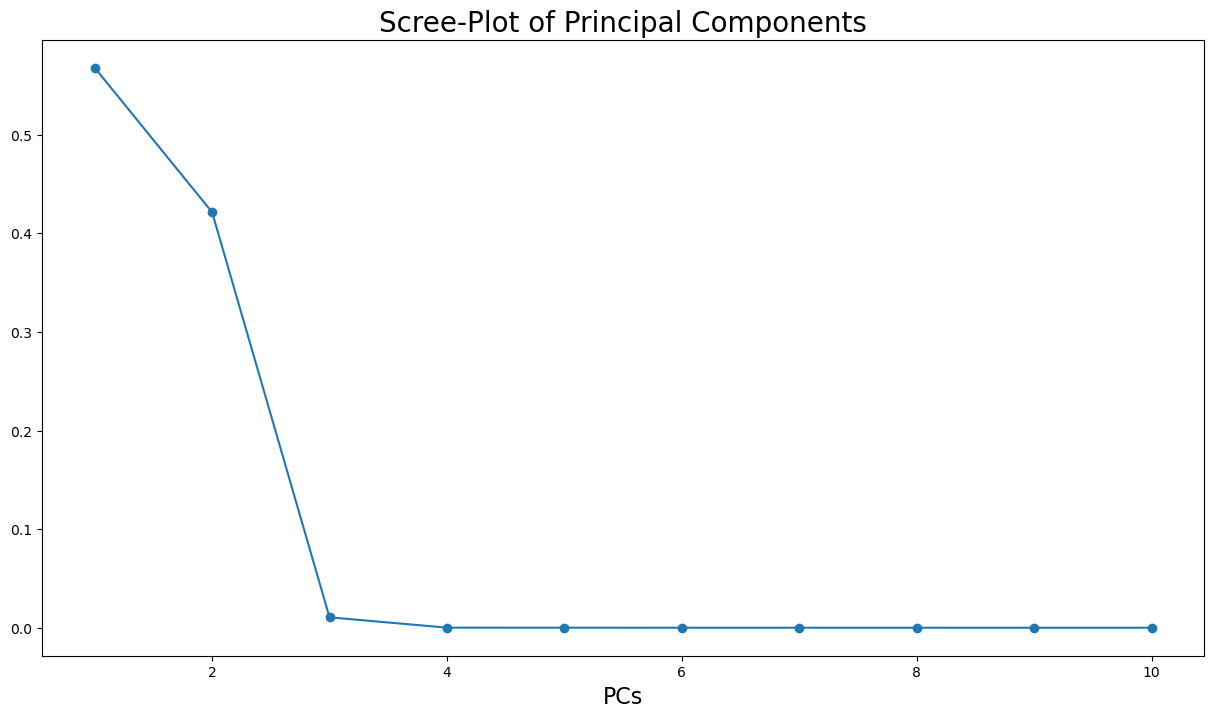

In [39]:
#聚类效果图不好，还是不要展示了。。。但是
#分成四簇时，用PCA法对聚类结果做数据可视化展示
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(train_X_HeartDisease_sel)

plt.figure(figsize=(15,8), dpi=100)
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.scatter(range(1,11),pca.explained_variance_ratio_)
plt.xlabel("PCs", fontdict={'size': 16})
plt.title("Scree-Plot of Principal Components", fontdict={'size': 20})
plt.show()

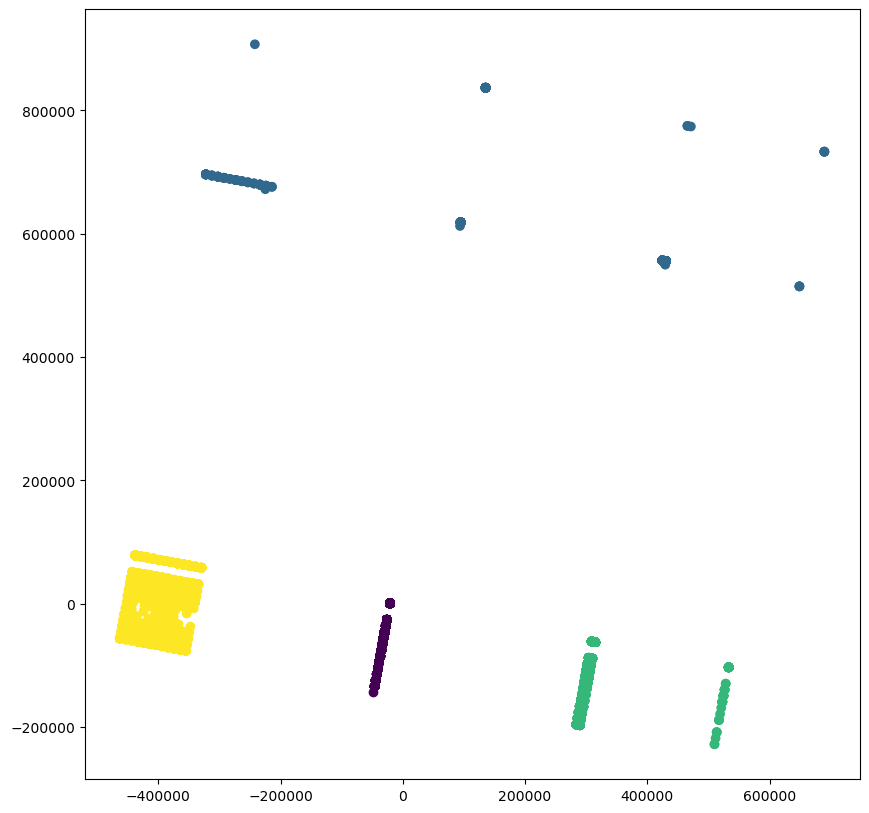

In [40]:
train_X_HeartDisease_sel3_reduction = PCA(n_components=2).fit_transform(train_X_HeartDisease_sel)
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_X_HeartDisease_sel3_reduction)
PC1 = train_X_HeartDisease_sel3_reduction[:,0]
PC2 = train_X_HeartDisease_sel3_reduction[:,1]

fig = plt.figure(figsize=(10,10))
plt.scatter(PC1,PC2,c=kmeans.labels_)
plt.show()

# ②预测不同类型的心脏病患者是否会中风以及中风的几率

# 法一：MLP+K-fold，调整一下MLP层数以及每层节点数再试试

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

#利用MLP以及5折交叉验证输出预测的每个调查者是否会中风
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 6), random_state=1)
kf = KFold(n_splits=5)
Stroke_predict1 =[]

#将40万患者平分，要将dataframe转list才能运行MLP
for train_index, test_index in kf.split(range(train_y.shape[0])):
    X=train_X_sel.iloc[train_index].values.tolist()
    y=np.array(train_y['Stroke'].iloc[train_index]).tolist()
    X_star=train_X_sel.iloc[test_index].values.tolist()
    clf.fit(X,y)
    Stroke_predict1.append(clf.predict(X_star))

C:\Users\zihan\.conda\envs\ML_Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\zihan\.conda\envs\ML_Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\zihan\.conda\envs\ML_Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_

In [42]:
#等于零说明把所有人都预测成了不中风，显然不太对
temp=np.array(Stroke_predict1)
print(sum(temp.reshape(400000,1)))

[41]


# 法二：Kmeans+K-fold 这个方法应该不行

In [43]:
Stroke_predict2 =[]
for train_index, test_index in kf.split(range(train_y.shape[0])):
    kmeans=KMeans(n_clusters=2, random_state=0).fit(train_X_sel.iloc[train_index])
    Stroke_predict2.append(kmeans.predict(train_X_sel.iloc[test_index]))

In [44]:
#把超过28万人都预测成了中风，与训练集里面的3w人中风结果相差太大
temp=np.array(Stroke_predict2)
print(temp)
print(sum(temp.reshape(400000,1)))

[[1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [0 0 1 ... 0 0 0]]
[286430]


# 法三：

In [45]:
#取出心脏病患者对应的
# train_y.iloc[train_X_HeartDisease_sel3.index]